In [8]:
import sys
import pandas as pd
import os
import numpy as np
from scipy import stats
import re
import csv
import tabulate
import math as m
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import scipy.io

path_data = '/home/juank/repos/corregistro/Analysis_dac/data/input/'
path2save = '/home/juank/Desktop/EJN2022/python/'

# plot
import matplotlib.pyplot as plt
import seaborn as sns

### Some plots on the csvs

In [9]:
df = pd.read_csv(path2save+'EJN2022_16subj_GeneralFilters.csv',encoding='utf-8') 
df_absent = pd.read_csv(path2save+'EJN2022_16subj_VSNTabsent_EX_manyNranks.csv',encoding='utf-8') 
df_pretar = pd.read_csv(path2save+'EJN2022_16subj_VSNTpre_EX_manyNranks.csv',encoding='utf-8') 

EX: len = 3292, median = 4, iqr = 7.0, max = 13
VSabsent: len = 4705, median = 5, iqr = 8.0, max = 16
VSpretarget: len = 2333, median = 4, iqr = 5.0, max = 14


<function matplotlib.pyplot.show(close=None, block=None)>

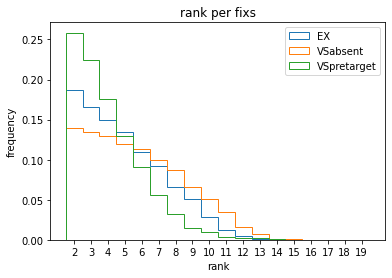

In [10]:
Xlabels = ['EX','VSabsent','VSpretarget']
X = [df[df['trial_type']=='EX']['rank'].to_numpy(), 
        df_absent[df_absent['trial_type']=='VS']['rank'].to_numpy(), 
        df_pretar[df_pretar['trial_type']=='VS']['rank'].to_numpy()]

for i in range(len(X)):
    print('%s: len = %d, median = %d, iqr = %.1f, max = %d'%(Xlabels[i],len(X[i]),np.median(X[i]),np.quantile(X[i],.75),max(X[i])))
    plt.hist(X[i], np.arange(1.5,20.5,1), histtype='step', stacked=True, fill=False, label=Xlabels[i], density=True)
plt.xticks(np.arange(2,20,1))
plt.legend(prop={'size': 10})
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('rank per fixs')
plt.show

In [11]:
def rank_trials(df):
    unique_sub = df['trial_subject'].unique()
    max_rank = []
    for sub in unique_sub:
        subs = df[df['trial_subject']==sub]
        unique_trial = subs['trial_number'].unique()
        for trial in unique_trial:
            dftr = subs[subs['trial_number']==trial]
            max_rank.append( max(dftr['rank']))
    return np.asarray(max_rank)

EX: len = 626, median = 7, max = 13
VSabsent: len = 663, median = 9, max = 16
VSpretarget: len = 630, median = 5, max = 14


<function matplotlib.pyplot.show(close=None, block=None)>

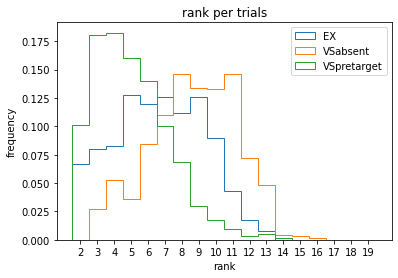

In [12]:
Xlabels = ['EX','VSabsent','VSpretarget']
X = [rank_trials(df[df['trial_type']=='EX']), 
        rank_trials(df_absent[df_absent['trial_type']=='VS']), 
        rank_trials(df_pretar[df_pretar['trial_type']=='VS'])]

for i in range(len(X)):
    print('%s: len = %d, median = %d, max = %d'%(Xlabels[i],len(X[i]),np.median(X[i]),max(X[i])))
    plt.hist(X[i], np.arange(1.5,20.5,1), histtype='step', stacked=True, fill=False, label=Xlabels[i], density=True)
plt.xticks(np.arange(2,20,1))
plt.legend(prop={'size': 10})
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('rank per trials')
plt.show